#### Lista extra - Exerc. 2   1. Importe as bibliotecas:

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### 2. Carregue os dados do arquivo advertising.csv para um dataframe.

In [25]:
vendas = pd.read_csv("C:\\Users\\FIC\\Documents\\fundamentos-datapython-erika\\Arquivos\\advertising.csv")

#### 3. Visualizar algumas informações básicas do dataframe:
a. Cabeçalho;

b. Final do dataframe;

c. Tipo de dados;

In [26]:
# a) 
vendas.head(1)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1


In [27]:
# b) 
vendas.tail(1)

,TV,Radio,Newspaper,Sales
199,232.1,8.6,8.7,18.4


In [28]:
# c) 
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### 4. Limpeza e análise exploratória dos dados:

a. Verificar se há dados nulos e mostrar a quantidade;

b. Resumo estatístico do dataframe;

c. Analise se há outliers no conjunto de dados. Crie o seguinte comando para analisarmos os dados: outliers são pontos fora da curva


In [29]:
# a)
vendas.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [30]:
# b)
vendas.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


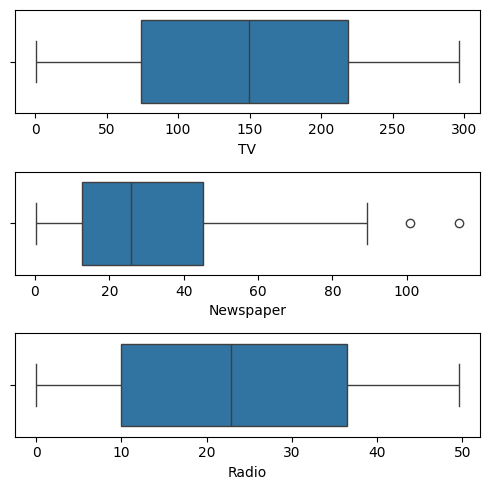

In [44]:
# c) # Analise de outliers 
fig, axs = plt.subplots(3, figsize=(5,5)) # grafico fig = figura axs = é o eixo
plt1 = sns.boxplot(vendas['TV'], ax = axs[0], orient='h')
plt2 = sns.boxplot(vendas['Newspaper'], ax = axs[1], orient='h')
plt3 = sns.boxplot(vendas['Radio'], ax = axs[2], orient='h')
plt.tight_layout() # divide em layouts individuais 

# as linhas no meio da figuras são as medias
# o tamanho dos graficos é a proporção de dispersão 
# as bolinhas fora do grafico são os outliers, que nesse caso não tem numeros consideraveis 

### Construa 3 graficos de dispersão, relacionando TV X SALES, NEWSPAPER X SALES, RADIO X SALES
CALCULAR O COEFICIENTE DE CORRELAÇÃO

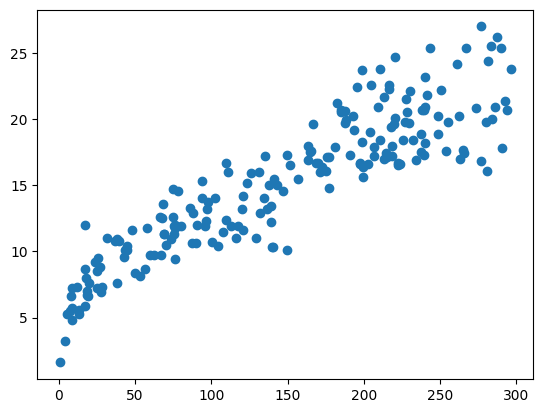

In [48]:
plt.scatter(data=vendas, x='TV', y='Sales')


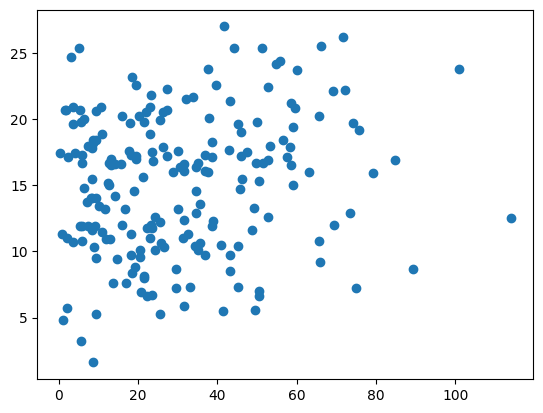

In [49]:
plt.scatter(data=vendas, x='Newspaper', y='Sales')

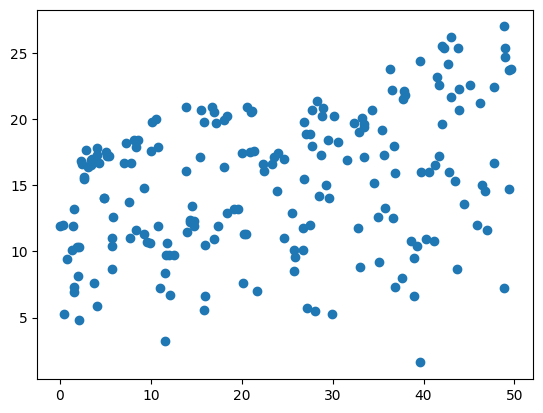

In [50]:
plt.scatter(data=vendas, x='Radio', y='Sales')

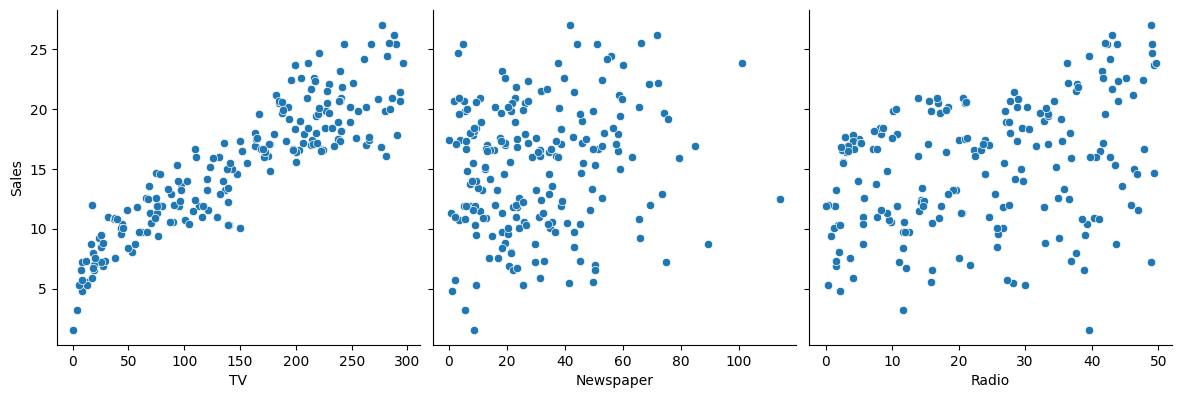

In [69]:
sns.pairplot(vendas, x_vars=['TV','Newspaper','Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')

In [52]:
vendas.corr()

# Nota-se pelos graficos anteriores a junção dos pontos mais densamente em TV, e é confirmado pelo calculo de relação dessa função

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


### GRAFICO MAPA DE CALOR

<Axes: >

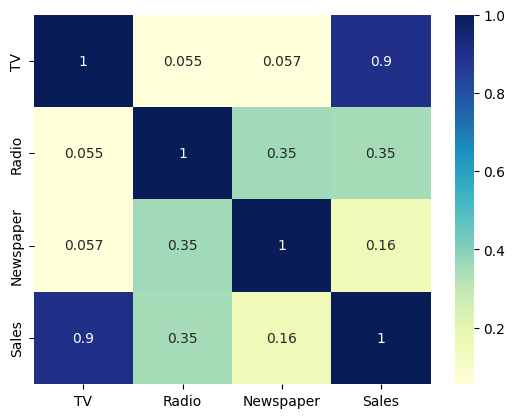

In [57]:
sns.heatmap(vendas.corr(), cmap='YlGnBu', annot=True) #cmap é para cor annot é pra por o rotulo

In [42]:
# d. Análise univariada da coluna sales. Utilize o comando plt.boxplot para exibir o comportamento dos dados.




In [ ]:
sns.pairplot(vendas,x_vars=['TV','Newspaper','Radio'],)

### 5. Separação dos dados em treino e teste:
a. Selecione a variável que têm maior correlação com as vendas e atribua ela à variável X. 

b. Separe os dados em treino e teste, utilizando o comando train_teste_split. Adote como tamanho da amostra de treino como sendo 30% e Random_state igual a 0;

c. Analise o tamanho das variáveis de treino e teste.

In [66]:

x = np.array(vendas['TV'])
y = vendas['Sales']
x= x.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3 # tamanho do teste
                                                    ,random_state=0)
print('quantidade de variaveis de treinamento',(len(X_train)))
print('quantidade de variaveis de teste',(len(X_test)))

print('tamanho dos dados',len(x))

quantidade de variaveis de treinamento 140
quantidade de variaveis de teste 60
tamanho dos dados 200


In [70]:
# Inicializar o algoritmo para treino

modelo = LinearRegression ()

# para treinar o modelo 

modelo.fit(X_train,y_train)

LinearRegression()

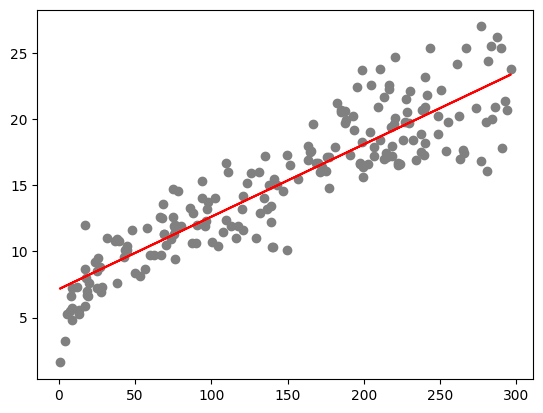

In [71]:
plt.scatter(x,y, color='gray')
plt.plot(x,modelo.predict(x), color='red')